In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# importing important libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Loading the Dataset**

In [4]:
netflix=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv") 
netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
print("There are {} rows and {} columns in the dataset.".format(netflix.shape[0],netflix.shape[1]))

There are 8807 rows and 12 columns in the dataset.


In [6]:
# checking for null values 
for i in netflix.columns:
    null_rate = netflix[i].isna().sum() / len(netflix) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

director's null rate :29.91%
cast's null rate :9.37%
country's null rate :9.44%
date_added's null rate :0.11%
rating's null rate :0.05%
duration's null rate :0.03%


# Handling missing values

Dropping the 'director' column completely as it has high volume of missing values and dropping  columns will not effect visualization.

In [7]:
netflix.drop(['director'],axis = 1,inplace = True)
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Filling all the missing values in the 'country' column with United States as Netflix was created in the USA and missing values in the 'cast' column are replaced with 'No Data'


In [8]:
netflix['country'].replace(np.nan, 'United States',inplace  = True)

netflix['cast'].replace(np.nan, 'No Data',inplace  = True)


Dropping the rows with missing values 

In [14]:
print('Dropping the missing rows from the columns 'date_added' and 'rating' since these have only {} missing rows in total.".
    format(netflix.isnull().sum().sum()))

I will drop the missing rows from the columns 'date_added' and 'rating' since these have only 17 missing rows in total.


In [17]:
netflix.dropna(inplace=True)

print("There are {} rows and {} columns after handling the missing records in the dataset.".format(netflix.shape[0],netflix.shape[1]))

There are 8790 rows and 11 columns after handling the missing records in the dataset.


In [18]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   cast          8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


The data type of the column 'date_added' is object, converting it into datetime format.

In [29]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['month_added']=netflix['date_added'].dt.month
netflix['year_added'] = netflix['date_added'].dt.year

# Droping the column 'date_added' as it we have seperate columns for 'year_added' and 'month_added'

netflix.drop('date_added',axis=1,inplace=True)
netflix.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,No Data,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


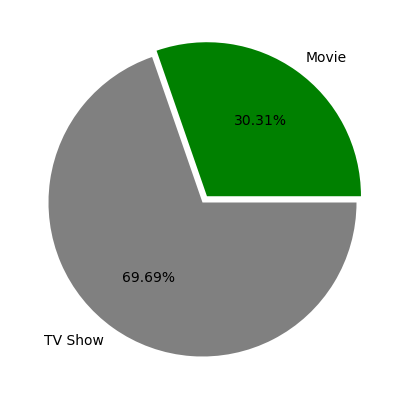

In [30]:
plt.figure(figsize=(10,5))
plt.pie(netflix['type'].value_counts().sort_values(),labels=netflix['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Green','grey'])
plt.show()

In [26]:
# split the data into Movies and TV Shows 
netflix_shows=netflix[netflix['type']=='TV Show']
netflix_Movies=netflix[netflix['type']=='Movie']

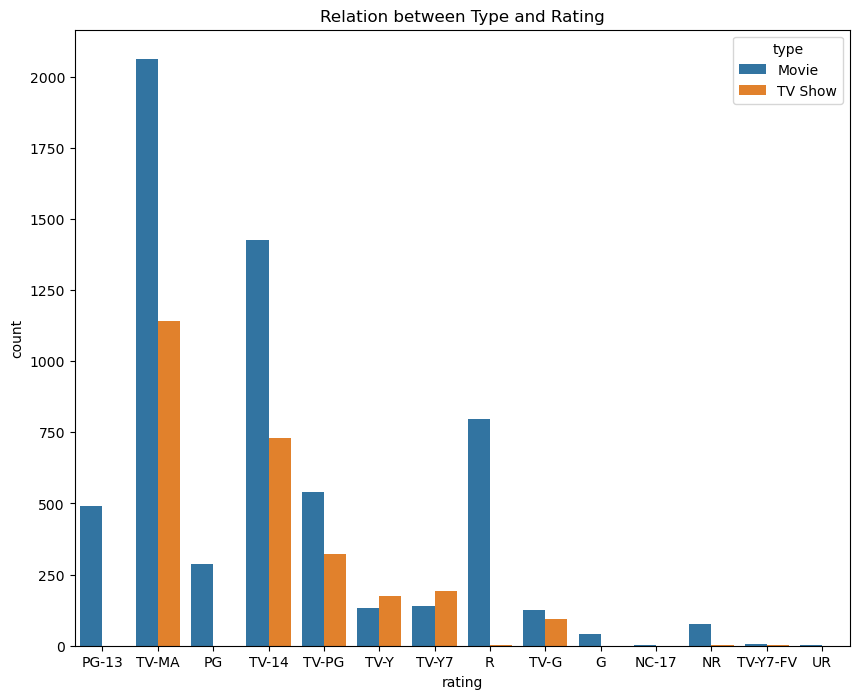

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

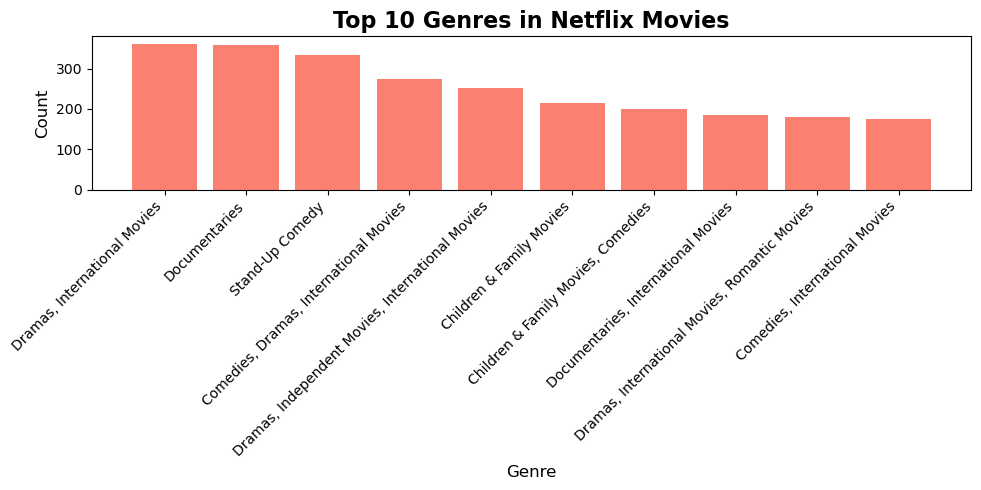

In [54]:
plt.figure(figsize=(10,5))
# Get the top 10 genres and their counts
top_10_genres = netflix_Movies["listed_in"].value_counts().head(10)
# Create a bar plot
plt.bar(top_10_genres.index, top_10_genres.values, color="salmon")
# Add a title and labels
plt.title("Top 10 Genres in Netflix Movies", fontsize=16, fontweight="bold")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.tight_layout()
plt.show()


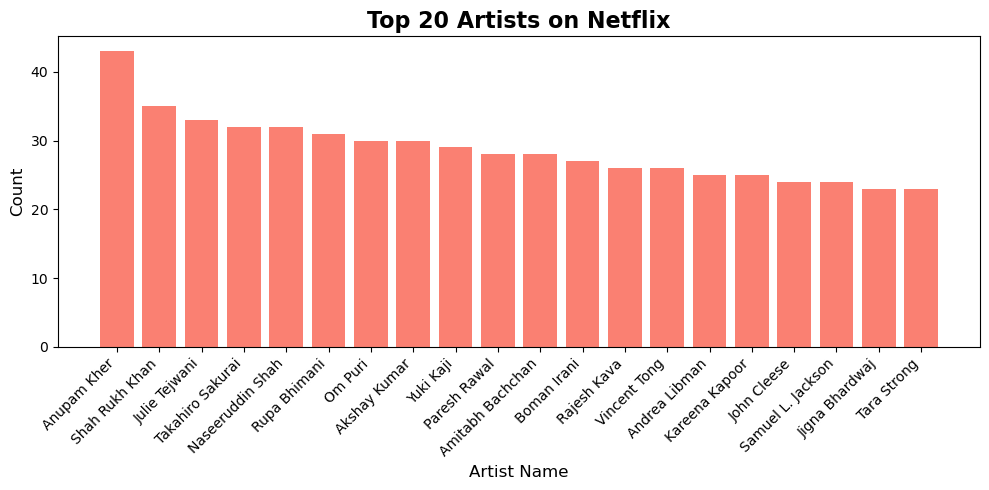

In [55]:
netflix['cast_name'] = netflix['cast'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
cast_count = []
for i in netflix['cast_name']: cast_count += i

cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]

plt.figure(figsize=(10, 5))

# Extract data for x and y values
x_values = df_cast_count['cast_name']
y_values = df_cast_count['count']

# Create a bar plot using Matplotlib
plt.bar(x_values, y_values, color="salmon")

# Add a title and labels
plt.title("Top 20 Artists on Netflix", fontsize=16, fontweight="bold")
plt.xlabel("Artist Name", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()


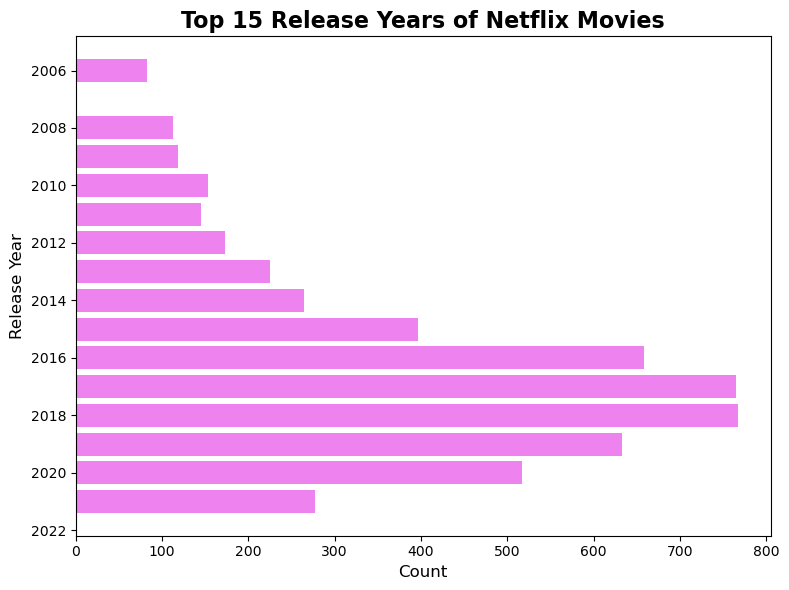

In [62]:
plt.figure(figsize=(8,6))

# Sort the release years by count in descending order
top_release_years = netflix_Movies['release_year'].value_counts().index[0:15]

# Create a bar plot using Matplotlib
plt.barh(top_release_years, netflix_Movies['release_year'].value_counts()[0:15], color='violet')

# Add labels and a title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.title('Top 15 Release Years of Netflix Movies', fontsize=16, fontweight='bold')

# Invert the y-axis to have the highest count at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()

Year 2018 was the year when maximum no. of movies were released 

/tmp/ipykernel_32/2654778295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
/tmp/ipykernel_32/2654778295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
/tmp/ipykernel_32/2654778295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

<Axes: xlabel='title'>

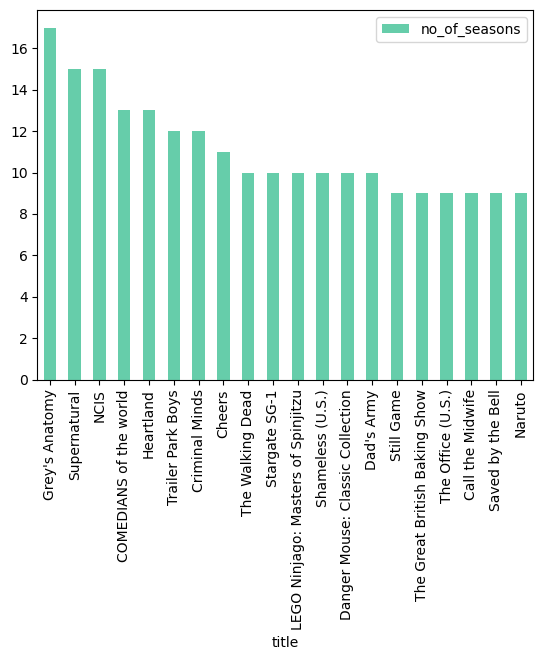

In [67]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='mediumaquamarine')


In [78]:
newest_shows=netflix_shows.sort_values(by='date_added', ascending=False)[0:10]
print("Newest Netflix Shows")
newest_shows



Newest Netflix Shows


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
3,s4,TV Show,Jailbirds New Orleans,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
11,s12,TV Show,Bangkok Breaking,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",United States,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
14,s15,TV Show,Crime Stories: India Detectives,No Data,United States,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
15,s16,TV Show,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...


In [79]:
newest_Movies=netflix_Movies.sort_values(by='date_added', ascending=False)[0:10]
print("Newest Netflix Movies")
newest_Movies

Newest Netflix Movies


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
12,s13,Movie,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
18,s19,Movie,Intrusion,"Freida Pinto, Logan Marshall-Green, Robert Joh...",United States,2021-09-22,2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,No Data,United States,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
22,s23,Movie,Avvai Shanmughi,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",United States,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",United States,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
